# Ocular Wellness & Sleep Analytics System (OWSAS)

## Import all the required Libraries.

In [84]:
#  Basic Libraries for the Model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as missi
import pickle
import warnings
from mlxtend.plotting import plot_decision_regions 
warnings.filterwarnings("ignore")
import plotly as pl

plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

## Data Collection and Understanding.

In [3]:
dataset = pd.read_csv("Dry_Eye_Dataset.csv")

In [4]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [5]:
dataset.tail()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,Y,Y,3.8,N,Y,N,Y,Y
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,N,Y,Y,N,3.8,N,N,Y,N,Y
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,Y,Y,N,N,8.4,N,N,Y,N,N
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,Y,N,2.2,N,N,N,Y,Y
19999,M,37,5.0,5,3,96/90,73,13000,57,188,...,N,Y,Y,Y,4.2,Y,N,N,N,N


In [6]:
dataset.shape

(20000, 26)

## EDA (Exploratory Data Analysis)

In [7]:
dataset.shape

#  we have the 20000 rows and the 26 columns.

(20000, 26)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [9]:
dataset.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [10]:
#  Check the Number of columns into the dataset.
dataset.columns

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity',
       'Height', 'Weight', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Average screen time', 'Blue-light filter',
       'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')

In [11]:
dataset.isnull().sum()
#  so we dont have the any kind of null value present into the dataset.

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64

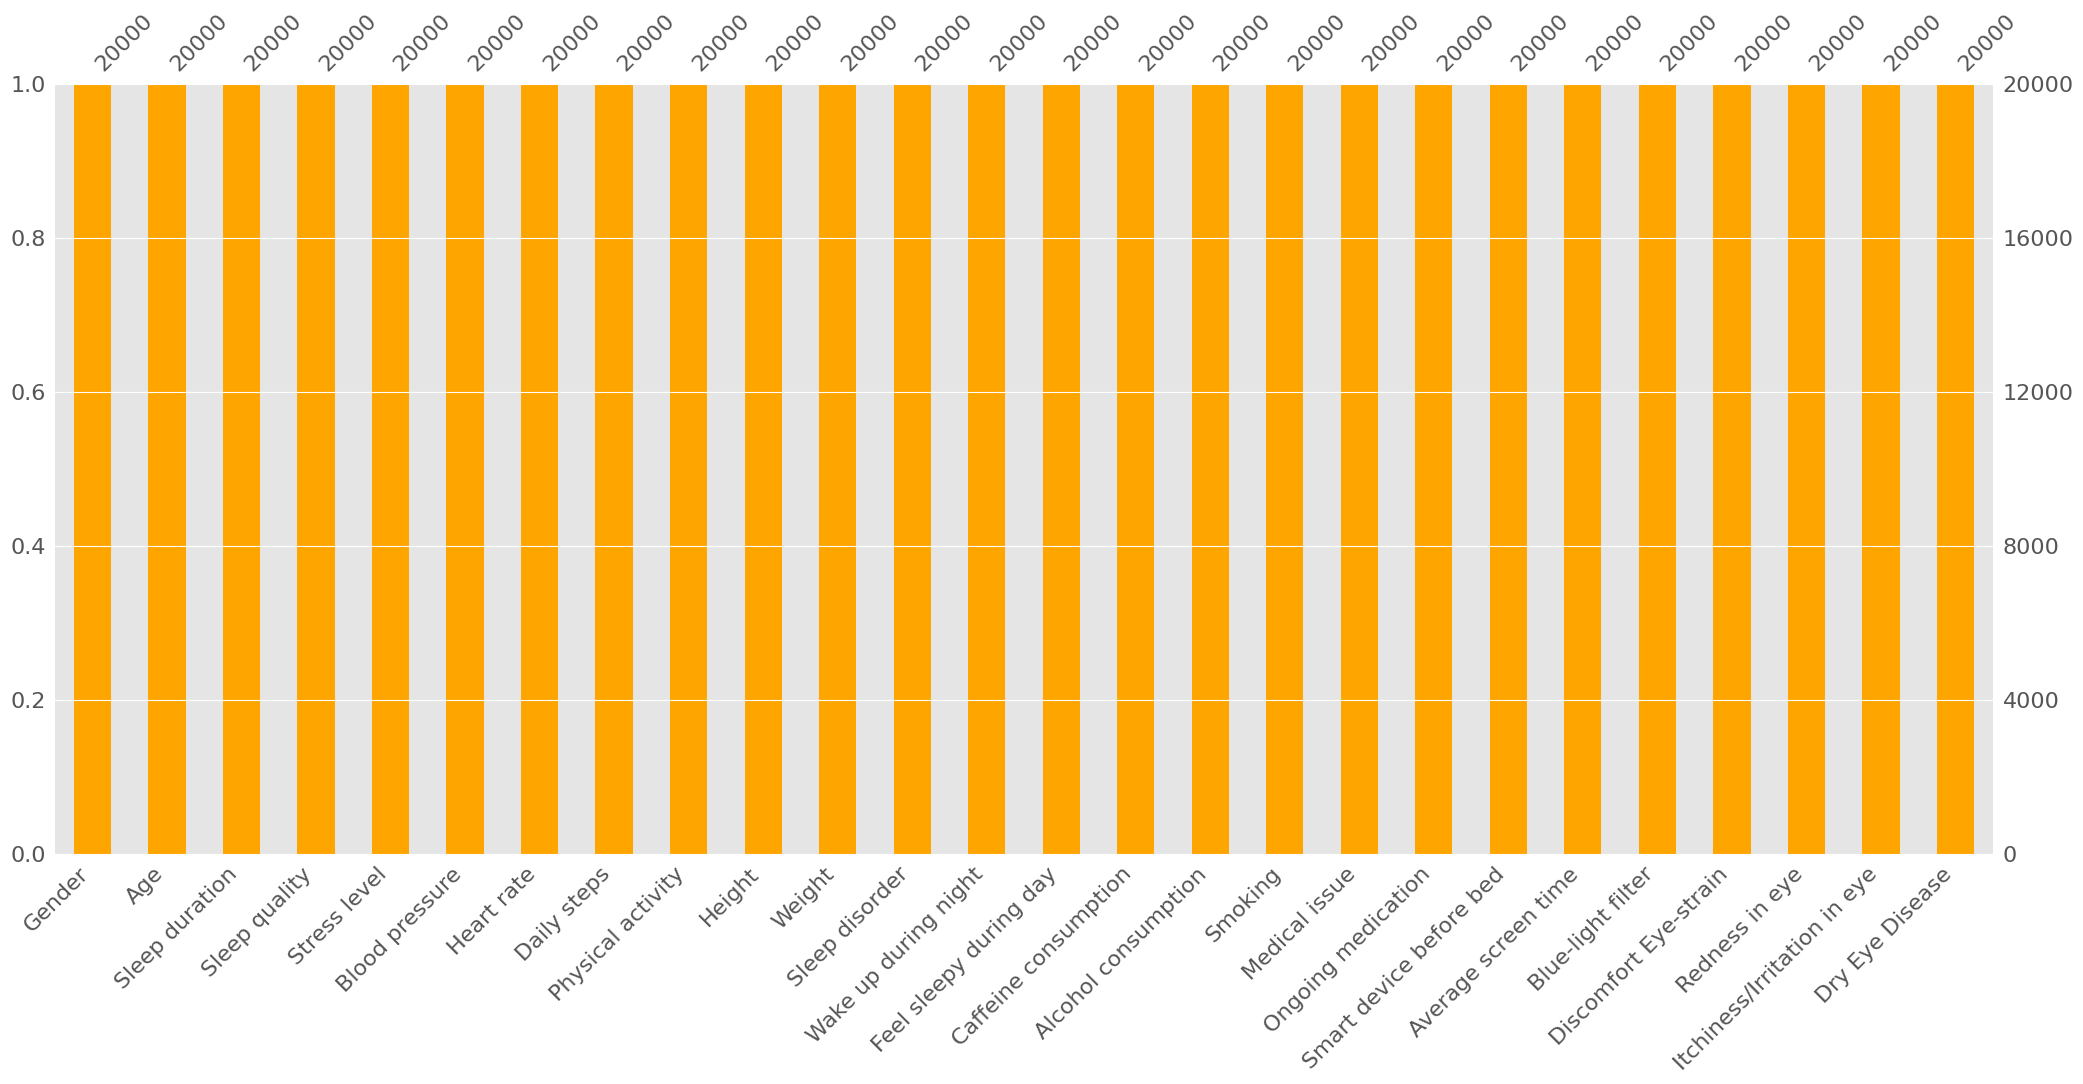

In [12]:
missi.bar(dataset,color="orange")
plt.show()

In [13]:
# Check the duplicate data into the dataset.
dataset.duplicated().sum()

#  we dont have the duplicate data into the dataset

0

In [14]:
#  Split the columns into the categorical and the numerical value.
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## Feature Engineering Onto the dataset

In [15]:
# Perform the feature engineering into the EDA part for better Visualization.
#  we divide the Blood Pressure Feature into the two different feature.
# dataset[['Systolic BP', 'Diastolic BP']] = dataset["Blood pressure"]

dataset[['Systolic BP', 'Diastolic BP']] = dataset["Blood pressure"].str.split("/", expand=True).astype(int)

In [16]:
dataset

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,Y,N,8.7,N,Y,Y,N,Y,137,89
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,Y,N,9.6,Y,N,N,Y,Y,108,64
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,Y,4.0,N,Y,N,N,N,134,81
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,N,7.6,N,Y,N,Y,N,110,90
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,N,3.5,N,Y,Y,N,Y,99,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,3.8,N,Y,N,Y,Y,132,64
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,Y,N,3.8,N,N,Y,N,Y,101,75
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,N,N,8.4,N,N,Y,N,N,124,63
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,2.2,N,N,N,Y,Y,136,70


In [17]:
dataset["Pulse pressure"] = dataset["Systolic BP"] - dataset["Diastolic BP"]

## 

In [18]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,8.7,N,Y,Y,N,Y,137,89,48
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,9.6,Y,N,N,Y,Y,108,64,44
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,Y,4.0,N,Y,N,N,N,134,81,53
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,7.6,N,Y,N,Y,N,110,90,20
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,3.5,N,Y,Y,N,Y,99,67,32


In [19]:
#  we need to remove some unnecessary features that not make the huge impact on our target Variable.
dropped_features = ["Blood pressure", "Height", "Weight", "Wake up during night", "Caffeine consumption", "Smart device before bed"]

dataset = dataset.drop(columns=dropped_features, axis=1)

In [20]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Sleep disorder,Feel sleepy during day,...,Ongoing medication,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,F,24,9.5,2,1,67,3000,31,Y,N,...,Y,8.7,N,Y,Y,N,Y,137,89,48
1,M,39,9.6,2,3,60,12000,74,N,N,...,Y,9.6,Y,N,N,Y,Y,108,64,44
2,F,45,5.4,1,5,95,12000,93,Y,N,...,N,4.0,N,Y,N,N,N,134,81,53
3,F,45,5.4,4,5,78,19000,32,N,N,...,N,7.6,N,Y,N,Y,N,110,90,20
4,F,42,5.7,3,2,72,4000,173,N,N,...,N,3.5,N,Y,Y,N,Y,99,67,32


In [21]:
dataset_col = dataset.columns
dataset_col

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Heart rate', 'Daily steps', 'Physical activity', 'Sleep disorder',
       'Feel sleepy during day', 'Alcohol consumption', 'Smoking',
       'Medical issue', 'Ongoing medication', 'Average screen time',
       'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease', 'Systolic BP',
       'Diastolic BP', 'Pulse pressure'],
      dtype='object')

In [22]:
#  Split the features into the categorical and the numerical features.
# categorical_feature = []
categorical_feature_with_no = dataset.select_dtypes(include="object").columns.to_list() + ["Sleep quality", "Stress level"]
categorical_feature = dataset.select_dtypes(include="object").columns.to_list()
numerical_features = [i for i in dataset_col if i not in categorical_feature]

len(categorical_feature)
len(categorical_feature_with_no)

14

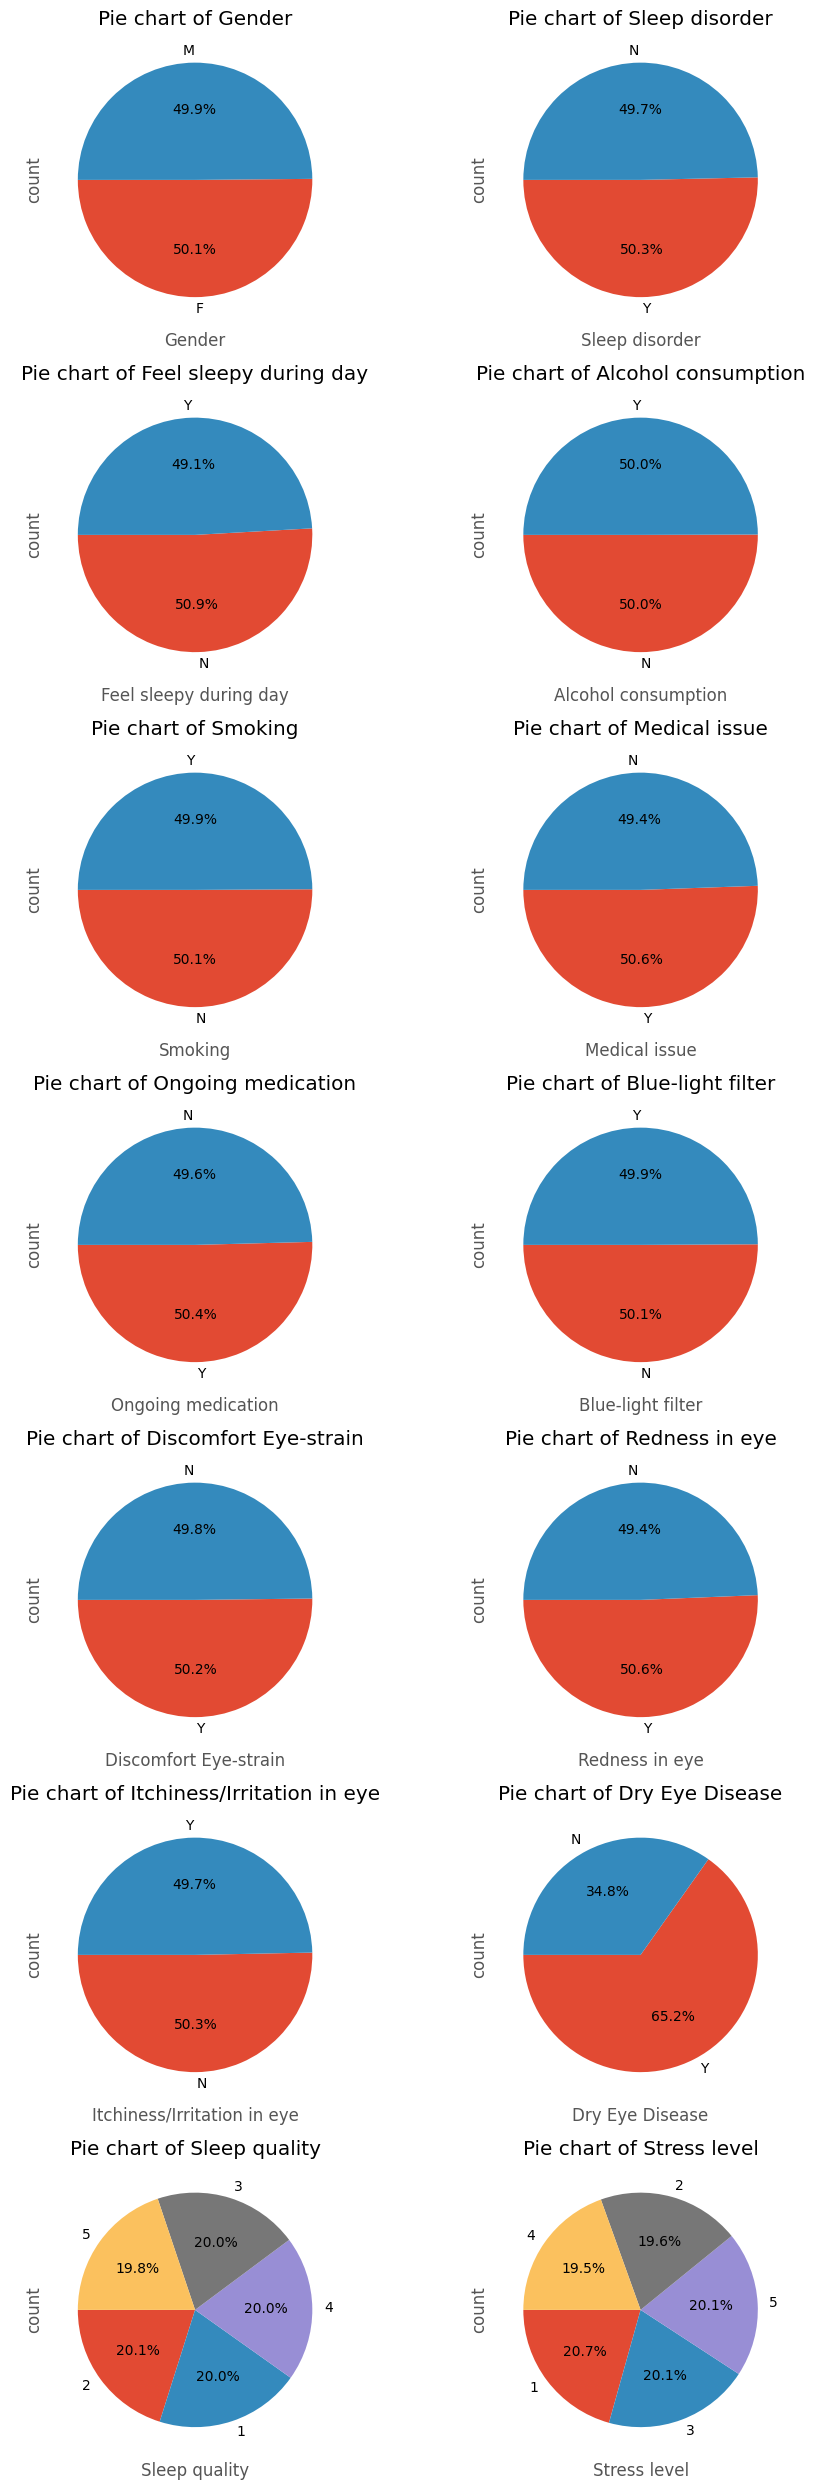

In [23]:
#  Find the distinct value for the object datatype value.

plt.figure(figsize=(10,25))
for i,val in enumerate(categorical_feature_with_no):
    # print(val, dataset[val].unique())
    plt.subplot(7, 2, i + 1)
    # plt.pie(dataset[val].value_counts(), autopct="%.1f%%", startangle=90, labels=val)
    dataset[val].value_counts().plot.pie(autopct="%.1f%%", startangle=180, labels=dataset[val].unique())
    plt.title(f"Pie chart of {val}")
    plt.xlabel(val)

plt.tight_layout()
plt.show()

In [24]:
len(numerical_features)

11

## Analysis Part 1 (For Numerical features)

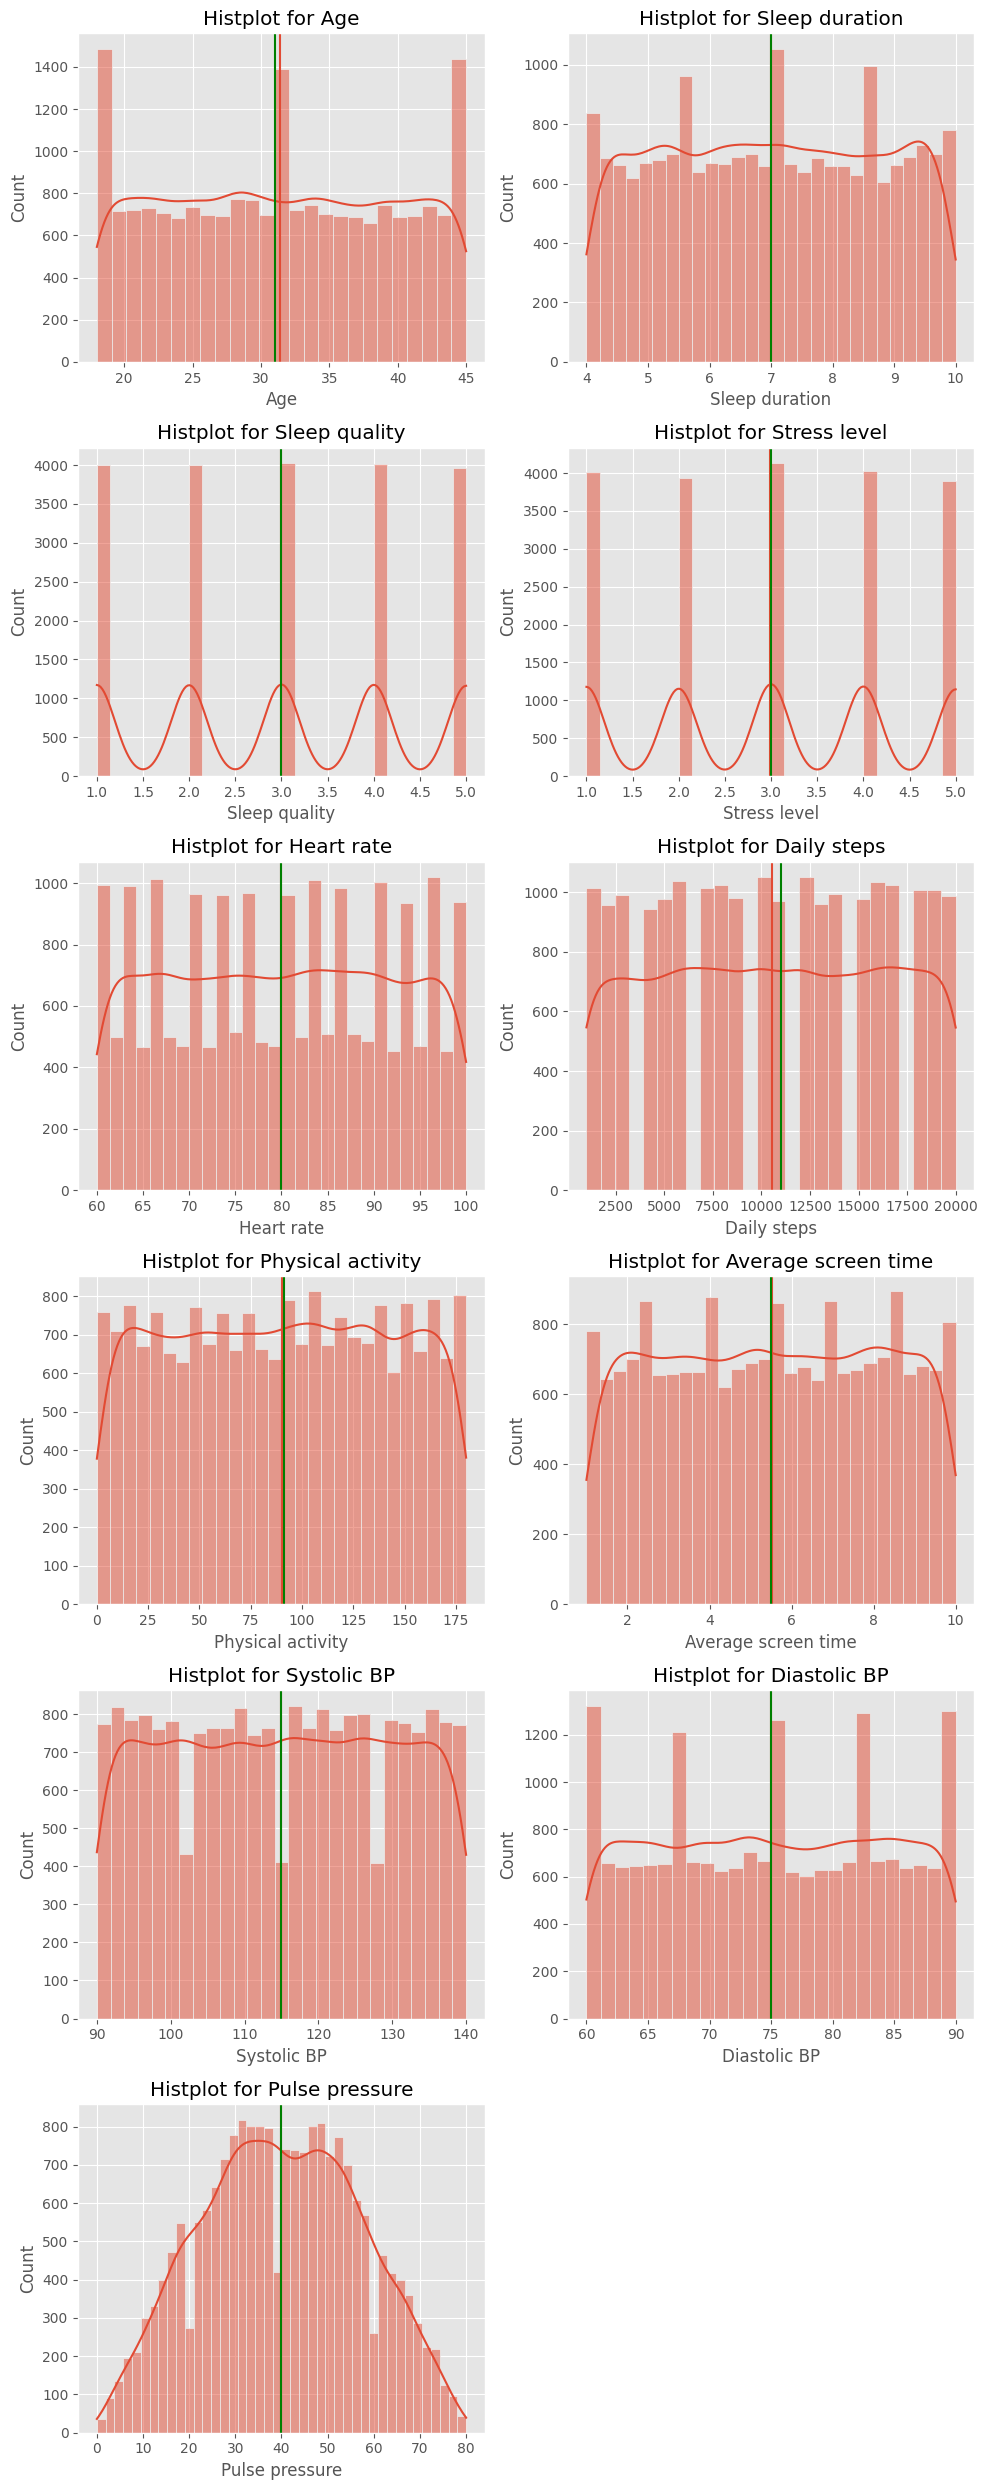

In [25]:
#  From here we need to find some analysis on the numerical Dataset.

plt.figure(figsize=(10,25))
for i,val in enumerate(numerical_features):
    plt.subplot(6, 2, i + 1)
    sns.histplot(x = dataset[val], data = dataset, kde=True)
    plt.title(f"Histplot for {val}")
    plt.xlabel(val)

    #  plot the mean and the median line on the graph.
    mean_val = dataset[val].mean()
    median_val = dataset[val].median()

    plt.axvline(mean_val)
    plt.axvline(median_val, color = "green")

plt.tight_layout()
plt.show()

In [26]:
#  Find the correlated matrix for the dataset and if any high correlated feature present we will be removed out for the better prediction and accuracy.
dataset[numerical_features].corr()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Average screen time,Systolic BP,Diastolic BP,Pulse pressure
Age,1.000000,0.004857,0.002513,0.008379,-0.001196,0.001302,-0.009191,0.003177,0.018157,-0.016013,0.023835
Sleep duration,0.004857,1.000000,-0.006892,-0.006088,-0.029175,0.002823,0.001858,-0.004208,-0.000939,-0.000648,-0.000465
Sleep quality,0.002513,-0.006892,1.000000,0.000721,-0.014326,-0.003074,-0.010329,0.004697,0.007444,-0.006604,0.009792
Stress level,0.008379,-0.006088,0.000721,1.000000,-0.008332,-0.005978,0.004272,-0.001344,0.003786,0.004450,0.000917
Heart rate,-0.001196,-0.029175,-0.014326,-0.008332,1.000000,-0.001899,0.001334,0.002467,-0.005864,0.004728,-0.007467
Daily steps,0.001302,0.002823,-0.003074,-0.005978,-0.001899,1.000000,0.008413,-0.008670,-0.003174,-0.001200,-0.002085
Physical activity,-0.009191,0.001858,-0.010329,0.004272,0.001334,0.008413,1.000000,0.006469,-0.003794,0.006379,-0.006559
Average screen time,0.003177,-0.004208,0.004697,-0.001344,0.002467,-0.008670,0.006469,1.000000,-0.009392,-0.009701,-0.002971
Systolic BP,0.018157,-0.000939,0.007444,0.003786,-0.005864,-0.003174,-0.003794,-0.009392,1.000000,-0.000374,0.853952
Diastolic BP,-0.016013,-0.000648,-0.006604,0.004450,0.004728,-0.001200,0.006379,-0.009701,-0.000374,1.000000,-0.520672


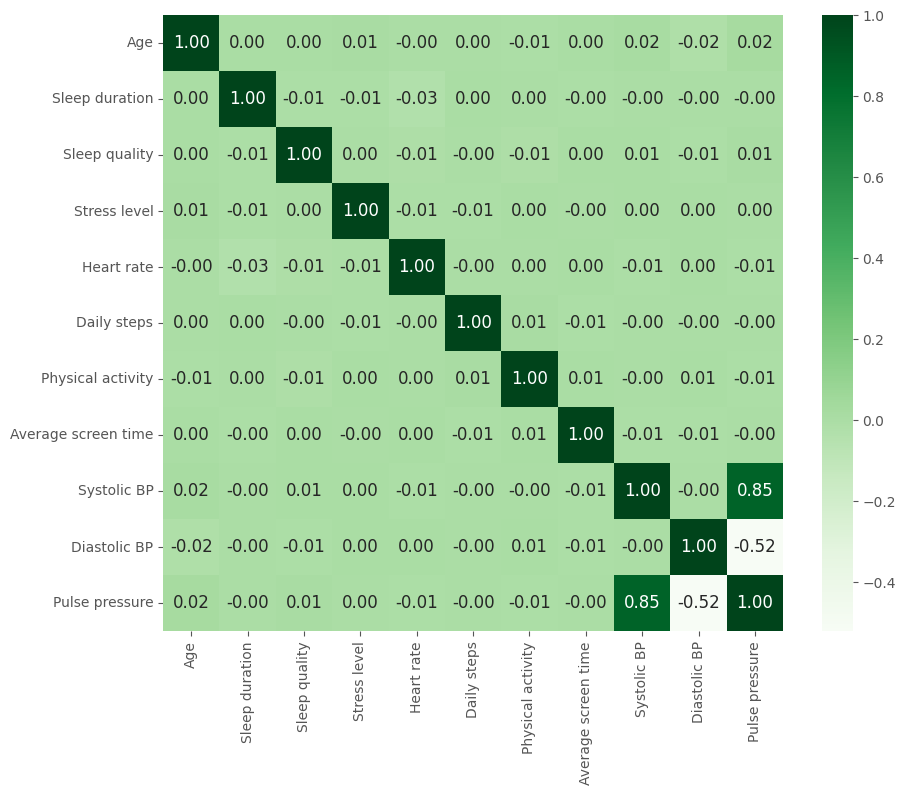

In [27]:
#  Create the Heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(dataset[numerical_features].corr(), fmt='.2f', annot=True, annot_kws={"size": 12}, cmap="Greens")
plt.show()

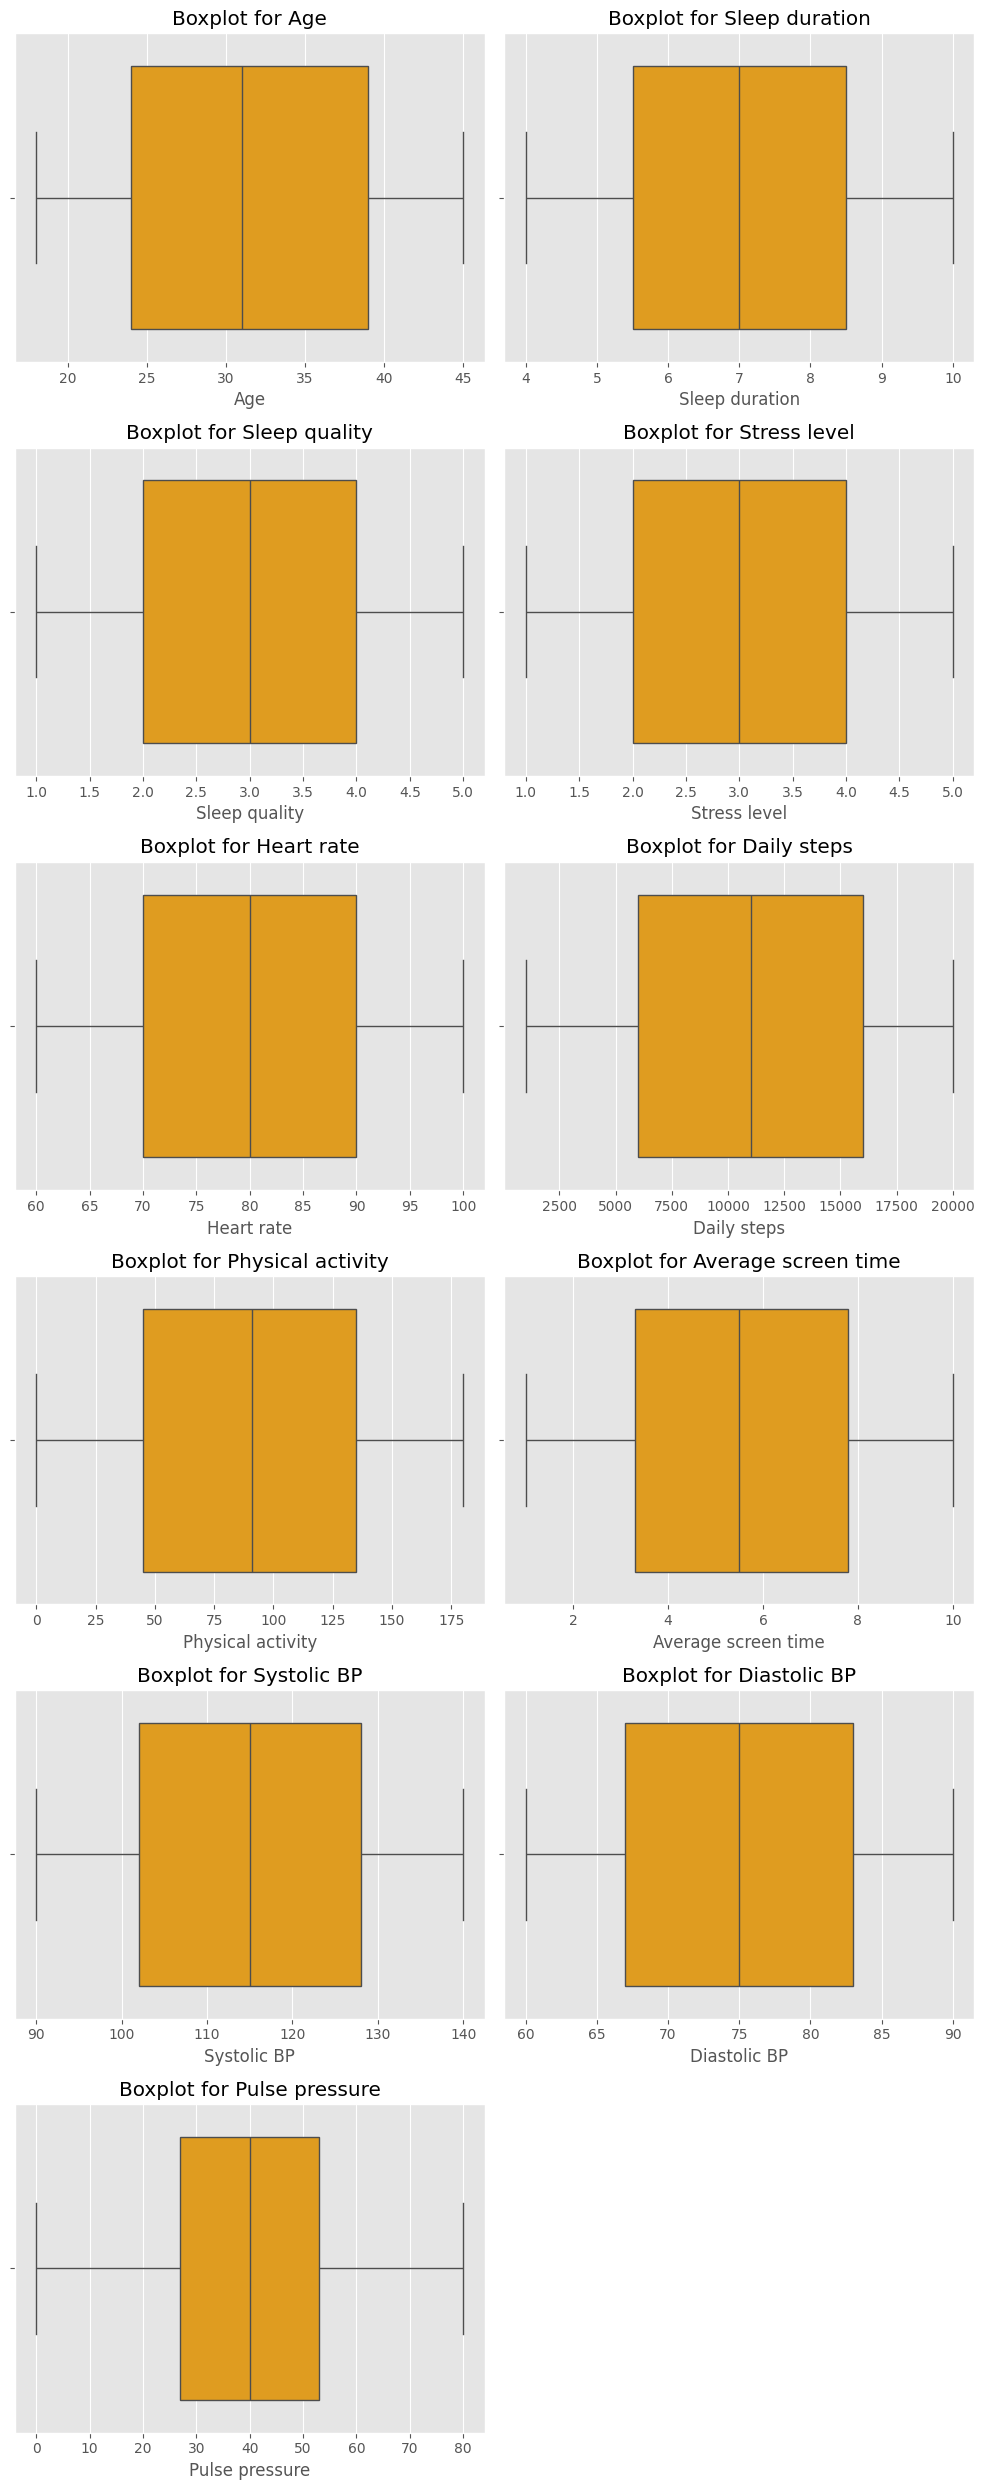

In [28]:
# Detect the outlier in the numerical features.
#  From here we need to find some analysis on the numerical Dataset.

plt.figure(figsize=(10,25))
for i,val in enumerate(numerical_features):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(x = dataset[val], data = dataset, color="orange")
    plt.title(f"Boxplot for {val}")
    plt.xlabel(val)
    #  plot the mean and the median line on the graph.
    # mean_val = dataset[val].mean()
    # median_val = dataset[val].median()

    # plt.axvline(mean_val)
    # plt.axvline(median_val, color = "green")

plt.tight_layout()
plt.show()

#  It is good to know that in out numerical features we dont have any kind of the outliers means that we have the good dataset

## Analysis Part 2 (For Categoical features)

In [29]:
len(categorical_feature_with_no)

14

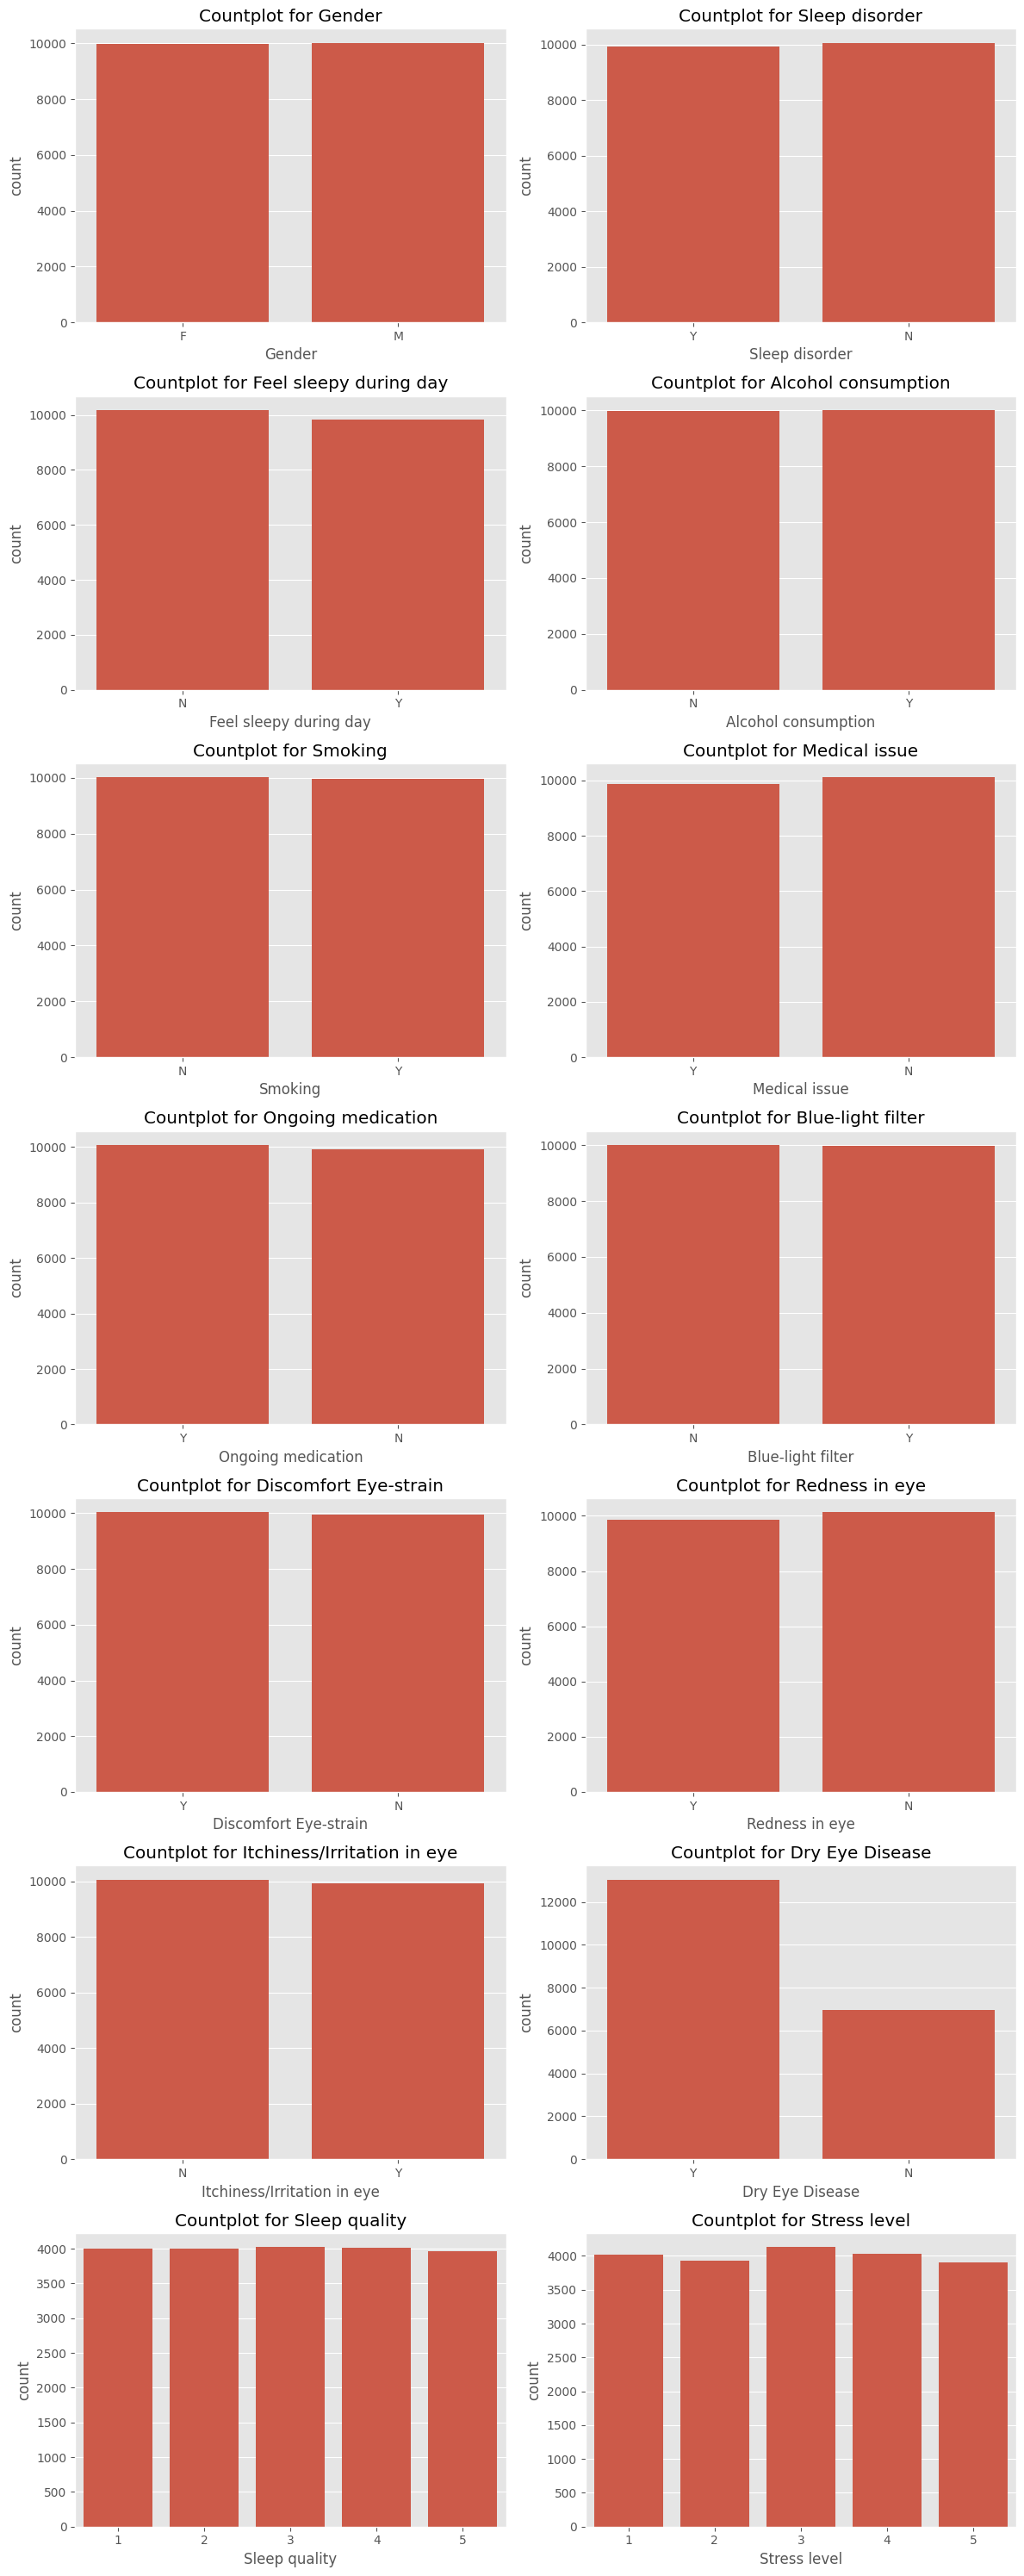

In [30]:
# count plot for better understanding about the categorical Feature.

plt.figure(figsize=(12,30))
colors = ["green", "red"]
for i,val in enumerate(categorical_feature_with_no):
    plt.subplot(7, 2, i + 1)
    sns.countplot(x = dataset[val], data = dataset)
    plt.title(f"Countplot for {val}")
    plt.xlabel(val)

plt.tight_layout()
plt.show()

In [31]:
## Check for the Imbalance Dataset.
print(dataset["Dry Eye Disease"].value_counts()[0] / len(dataset["Dry Eye Disease"]) * 100)
print(dataset["Dry Eye Disease"].value_counts()[1] / len(dataset["Dry Eye Disease"]) * 100)

65.185
34.815000000000005


In [32]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Sleep disorder,Feel sleepy during day,...,Ongoing medication,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,F,24,9.5,2,1,67,3000,31,Y,N,...,Y,8.7,N,Y,Y,N,Y,137,89,48
1,M,39,9.6,2,3,60,12000,74,N,N,...,Y,9.6,Y,N,N,Y,Y,108,64,44
2,F,45,5.4,1,5,95,12000,93,Y,N,...,N,4.0,N,Y,N,N,N,134,81,53
3,F,45,5.4,4,5,78,19000,32,N,N,...,N,7.6,N,Y,N,Y,N,110,90,20
4,F,42,5.7,3,2,72,4000,173,N,N,...,N,3.5,N,Y,Y,N,Y,99,67,32


## Data Preprocessing

In [33]:
# we need to process the data so for that we need to perform the some operation onto the dataset.

# Perform the Label Encoding on the categorical features.
encoder = LabelEncoder()

for i,val in enumerate(categorical_feature):
    dataset[val] = encoder.fit_transform(dataset[val])


#  Save the Label Encoder for the future new Data.
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [34]:
#  See the Unique Values from all the Values.
for i in categorical_feature_with_no:
    print(i, dataset[i].value_counts())
    print("-" * 70)

Gender Gender
1    10028
0     9972
Name: count, dtype: int64
----------------------------------------------------------------------
Sleep disorder Sleep disorder
0    10069
1     9931
Name: count, dtype: int64
----------------------------------------------------------------------
Feel sleepy during day Feel sleepy during day
0    10178
1     9822
Name: count, dtype: int64
----------------------------------------------------------------------
Alcohol consumption Alcohol consumption
1    10009
0     9991
Name: count, dtype: int64
----------------------------------------------------------------------
Smoking Smoking
0    10017
1     9983
Name: count, dtype: int64
----------------------------------------------------------------------
Medical issue Medical issue
0    10111
1     9889
Name: count, dtype: int64
----------------------------------------------------------------------
Ongoing medication Ongoing medication
1    10082
0     9918
Name: count, dtype: int64
--------------------------

In [35]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Sleep disorder,Feel sleepy during day,...,Ongoing medication,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,0,24,9.5,2,1,67,3000,31,1,0,...,1,8.7,0,1,1,0,1,137,89,48
1,1,39,9.6,2,3,60,12000,74,0,0,...,1,9.6,1,0,0,1,1,108,64,44
2,0,45,5.4,1,5,95,12000,93,1,0,...,0,4.0,0,1,0,0,0,134,81,53
3,0,45,5.4,4,5,78,19000,32,0,0,...,0,7.6,0,1,0,1,0,110,90,20
4,0,42,5.7,3,2,72,4000,173,0,0,...,0,3.5,0,1,1,0,1,99,67,32


## Split the Data into the Dependent and the Independent Variable.

In [36]:

x = dataset.drop("Dry Eye Disease", axis=1)
y = dataset["Dry Eye Disease"]

## Split the Data into the training and the testing Data.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [38]:
print(x.shape, x_train.shape, x_test.shape)

(20000, 22) (16000, 22) (4000, 22)


In [39]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Sleep disorder,Feel sleepy during day,...,Ongoing medication,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,0,24,9.5,2,1,67,3000,31,1,0,...,1,8.7,0,1,1,0,1,137,89,48
1,1,39,9.6,2,3,60,12000,74,0,0,...,1,9.6,1,0,0,1,1,108,64,44
2,0,45,5.4,1,5,95,12000,93,1,0,...,0,4.0,0,1,0,0,0,134,81,53
3,0,45,5.4,4,5,78,19000,32,0,0,...,0,7.6,0,1,0,1,0,110,90,20
4,0,42,5.7,3,2,72,4000,173,0,0,...,0,3.5,0,1,1,0,1,99,67,32


In [40]:
#  Save the cleaned Dataset for the PowerBI Dashboard.
# dataset.to_csv("cleaned_data.csv")

In [41]:
#  Now here we have our cleaned dataset not its time to perform the feature Scaling.
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#  Save the Standard Scaler for the Future Prediction.
with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [42]:
x_train.shape, x_test.shape

((16000, 22), (4000, 22))

## Model Building and Implementation.

1. Train the Logistic Regression

In [43]:
model1 = LogisticRegression(C=0.01)

model1.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [44]:
# Finding the Accuracy for the Logistic Regression Model.
print("The training accuracy for Logistic Regression are:- ", accuracy_score(model1.predict(x_train), y_train)) 
print("The testing accuracy for Logistic Regression are:- ", accuracy_score(model1.predict(x_test), y_test))
model1_accu = accuracy_score(model1.predict(x_test), y_test)
print("The confusion matrix for Logistic Regression are:- ", confusion_matrix(model1.predict(x_test), y_test))
cm1 = confusion_matrix(model1.predict(x_test), y_test)
print("The classification report for Logistic Regression are:- ", classification_report(model1.predict(x_test), y_test))

The training accuracy for Logistic Regression are:-  0.68175
The testing accuracy for Logistic Regression are:-  0.6665
The confusion matrix for Logistic Regression are:-  [[ 160   91]
 [1243 2506]]
The classification report for Logistic Regression are:-                precision    recall  f1-score   support

           0       0.11      0.64      0.19       251
           1       0.96      0.67      0.79      3749

    accuracy                           0.67      4000
   macro avg       0.54      0.65      0.49      4000
weighted avg       0.91      0.67      0.75      4000



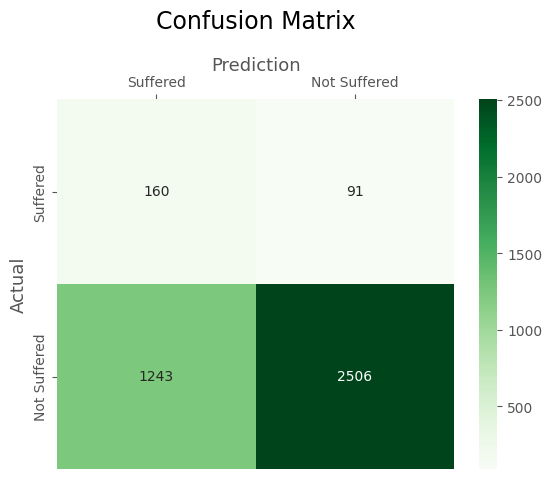

In [45]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm1, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

2. K Nearest Neighbour.

In [46]:
model2 = KNeighborsClassifier(n_neighbors=7)

model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
# Finding the Accuracy for the KNeighborsClassifier Regression Model.
print("The training accuracy for KNeighborsClassifier are:- ", accuracy_score(model2.predict(x_train), y_train)) 
print("The testing accuracy for KNeighborsClassifier are:- ", accuracy_score(model2.predict(x_test), y_test))
model2_accu = accuracy_score(model2.predict(x_test), y_test)
print("The confusion matrix for KNeighborsClassifier are:- ", confusion_matrix(model2.predict(x_test), y_test))
cm2 = confusion_matrix(model2.predict(x_test), y_test)
print("The classification report for KNeighborsClassifier are:- ", classification_report(model2.predict(x_test), y_test))

The training accuracy for KNeighborsClassifier are:-  0.7265
The testing accuracy for KNeighborsClassifier are:-  0.6265
The confusion matrix for KNeighborsClassifier are:-  [[ 386  477]
 [1017 2120]]
The classification report for KNeighborsClassifier are:-                precision    recall  f1-score   support

           0       0.28      0.45      0.34       863
           1       0.82      0.68      0.74      3137

    accuracy                           0.63      4000
   macro avg       0.55      0.56      0.54      4000
weighted avg       0.70      0.63      0.65      4000



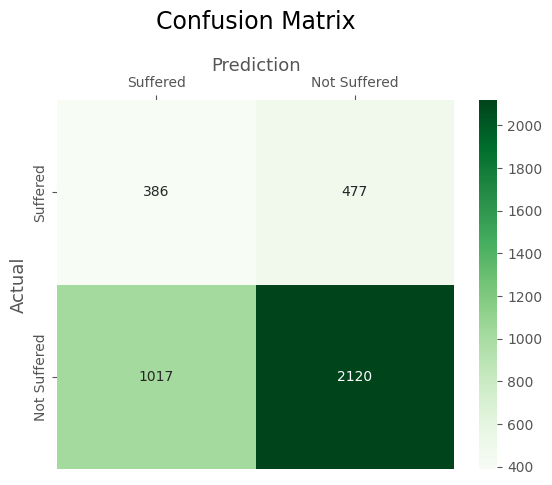

In [48]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm2, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

#  Our KNeighbour Classifier Model does not perform Well on the new Data.

3. Support Vector Classifier

In [49]:
model3 = SVC()

param_dist = {
    'C': [0.01, 0.1, 1, 5,10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale',"auto"],  
}

In [53]:
# #  Perform the Hyper Parameter Tuning fo finding the best Parameters for the Model.
# random_search_cv = RandomizedSearchCV(model3, param_dist, cv=5, n_jobs=-1, verbose=2)
# random_search_cv.fit(x_train, y_train)

In [54]:
model3.fit(x_train, y_train)

SVC()

In [57]:
# Finding the Accuracy for the SVC Model.
print("The training accuracy for SVC Model are:- ", accuracy_score(model3.predict(x_train), y_train)) 
print("The testing accuracy for SVC Model are:- ", accuracy_score(model3.predict(x_test), y_test))
model3_accu = accuracy_score(model3.predict(x_test), y_test)
print("The confusion matrix for SVC Model are:- ", confusion_matrix(model3.predict(x_test), y_test))
cm3 = confusion_matrix(model3.predict(x_test), y_test)
print("The classification report for SVC Model are:- ", classification_report(model3.predict(x_test), y_test))

The training accuracy for SVC Model are:-  0.7001875
The testing accuracy for SVC Model are:-  0.69175
The confusion matrix for SVC Model are:-  [[ 328  158]
 [1075 2439]]
The classification report for SVC Model are:-                precision    recall  f1-score   support

           0       0.23      0.67      0.35       486
           1       0.94      0.69      0.80      3514

    accuracy                           0.69      4000
   macro avg       0.59      0.68      0.57      4000
weighted avg       0.85      0.69      0.74      4000



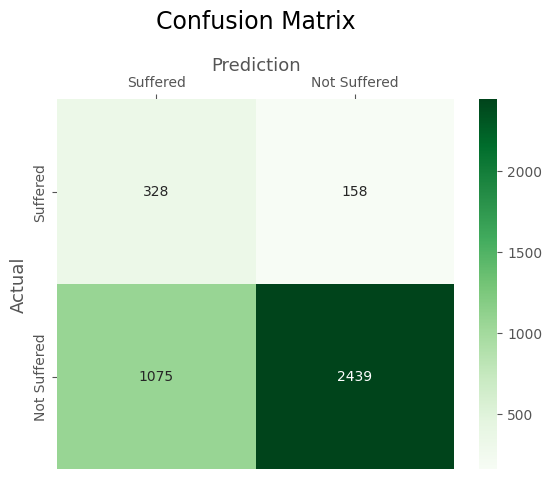

In [58]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm3, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

#  Our KNeighbour Classifier Model does not perform Well on the new Data.

4. Decision Tree Classifier

In [79]:
model4 = DecisionTreeClassifier()

parameters_grid = {
    "criterion":['gini', 'entropy','log_loss'],
    "splitter": ['best', 'random'],
    "max_depth":[3,4,5,7,10],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "ccp_alpha": [0.001,0.01,0.1,0.3,1]
}

# model4.fit(x_train, y_train)

random_search = RandomizedSearchCV(model4, parameters_grid, cv = 5, n_jobs=-1, verbose=2)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1, 0.3, 1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 7, 10],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [80]:
random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'criterion': 'entropy',
 'ccp_alpha': 0.01}

In [74]:
random_search.best_score_

0.699625

In [81]:
model4 = DecisionTreeClassifier(splitter='random', min_samples_split=4, min_samples_leaf=1, max_depth=4, criterion='entropy', ccp_alpha=0.01)

model4.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=4,
                       min_samples_split=4, splitter='random')

In [82]:
# Finding the Accuracy for the DecisionTreeClassifier  Model.
print("The training accuracy for DecisionTreeClassifier Model are:- ", accuracy_score(model4.predict(x_train), y_train)) 
print("The testing accuracy for DecisionTreeClassifier Model are:- ", accuracy_score(model4.predict(x_test), y_test))
model4_accu = accuracy_score(model4.predict(x_test), y_test)
print("The confusion matrix for DecisionTreeClassifier Model are:- ", confusion_matrix(model4.predict(x_test), y_test))
cm4 = confusion_matrix(model4.predict(x_test), y_test)
print("The classification report for DecisionTreeClassifier Model are:- ", classification_report(model4.predict(x_test), y_test))

The training accuracy for DecisionTreeClassifier Model are:-  0.699625
The testing accuracy for DecisionTreeClassifier Model are:-  0.69175
The confusion matrix for DecisionTreeClassifier Model are:-  [[ 328  158]
 [1075 2439]]
The classification report for DecisionTreeClassifier Model are:-                precision    recall  f1-score   support

           0       0.23      0.67      0.35       486
           1       0.94      0.69      0.80      3514

    accuracy                           0.69      4000
   macro avg       0.59      0.68      0.57      4000
weighted avg       0.85      0.69      0.74      4000



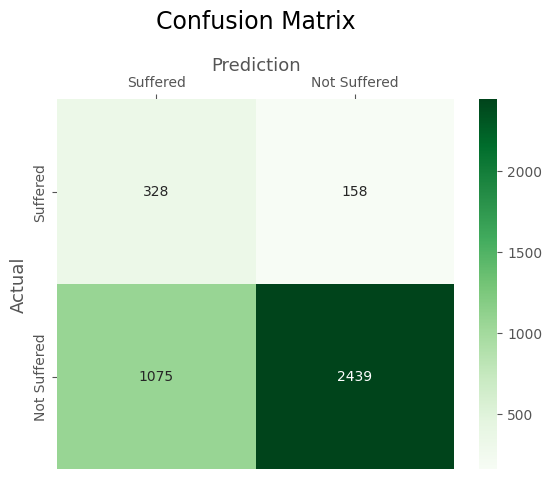

In [83]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm4, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

#  Our KNeighbour Classifier Model does not perform Well on the new Data.

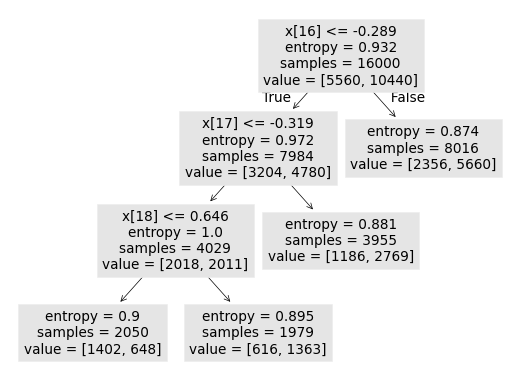

In [92]:
#  Build the Decision Tree for the Decision Tree Classifier
plot_tree(model4, label="all")
plt.show()

5. Random Forest Classifier  

In [105]:
model5 = RandomForestClassifier()     # Bad Performance Model

parameters = {
    "n_estimators": [100,150,200],
    "criterion":['gini','entropy'],
    "max_depth": [3,4,5,7],
    "min_samples_split": [1,2,3],
    "min_samples_leaf":[1,2,3],
    'n_jobs': [-1,1,2],
    'verbose': [1,2,3],
    'ccp_alpha': [0.001,0.01,0.1,0.3],
}

# model5.fit(x_train, y_train)

# random_search = RandomizedSearchCV(model5, parameters, cv = 5)
# random_search.fit(x_train, y_train)

In [93]:
random_search.best_params_

{'verbose': 3,
 'n_jobs': -1,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'gini',
 'ccp_alpha': 0.001}

In [94]:
random_search.best_score_

0.6539374999999998

In [110]:
# model5 = RandomForestClassifier(verbose=3, n_jobs=-1, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=5, criterion="gini", ccp_alpha=0.001)
# model5.fit(x_train, y_train)

In [102]:
# Finding the Accuracy for the RandomForestClassifier  Model.
print("The training accuracy for RandomForestClassifier Model are:- ", accuracy_score(model5.predict(x_train), y_train)) 
print("The testing accuracy for RandomForestClassifier Model are:- ", accuracy_score(model5.predict(x_test), y_test))
model5_accu = accuracy_score(model5.predict(x_test), y_test)
print("The confusion matrix for RandomForestClassifier Model are:- ", confusion_matrix(model5.predict(x_test), y_test))
cm5 = confusion_matrix(model5.predict(x_test), y_test)
print("The classification report for RandomForestClassifier Model are:- ", classification_report(model5.predict(x_test), y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


The training accuracy for RandomForestClassifier Model are:-  0.6525


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


The testing accuracy for RandomForestClassifier Model are:-  0.64925


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s


The confusion matrix for RandomForestClassifier Model are:-  [[   0    0]
 [1403 2597]]
The classification report for RandomForestClassifier Model are:-                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79      4000

    accuracy                           0.65      4000
   macro avg       0.50      0.32      0.39      4000
weighted avg       1.00      0.65      0.79      4000



[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


6. Gradient Boost Classifier

In [112]:
model6 = GradientBoostingClassifier()

#  Hyper Parameters Tuning.
parameters = {
    "loss":['log_loss', 'exponential'],
    "learning_rate":[0.001,0.01,0.1,0.3,0.5],
    "n_estimators":[100,150,200],
    "subsample":[0.9,1.0,2],
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[1,2],
   'max_depth': [3,4,5],
}

# model6.fit(x_train, y_train)

random_search = RandomizedSearchCV(model6, parameters, cv = 5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                          0.5],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [100, 150, 200],
                                        'subsample': [0.9, 1.0, 2]})

In [114]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'loss': 'log_loss',
 'learning_rate': 0.1}

In [115]:
random_search.best_score_

0.697875

In [116]:
model6 = GradientBoostingClassifier(subsample=1.0, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=3, loss='log_loss', learning_rate=0.1)
model6.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, n_estimators=200)

In [117]:
# Finding the Accuracy for the GradientBoostingClassifier  Model.
print("The training accuracy for GradientBoostingClassifier Model are:- ", accuracy_score(model6.predict(x_train), y_train)) 
print("The testing accuracy for GradientBoostingClassifier Model are:- ", accuracy_score(model6.predict(x_test), y_test))
model6_accu = accuracy_score(model6.predict(x_test), y_test)
print("The confusion matrix for GradientBoostingClassifier Model are:- ", confusion_matrix(model6.predict(x_test), y_test))
cm6 = confusion_matrix(model6.predict(x_test), y_test)
print("The classification report for GradientBoostingClassifie6 Model are:- ", classification_report(model6.predict(x_test), y_test))

The training accuracy for GradientBoostingClassifier Model are:-  0.703875
The testing accuracy for GradientBoostingClassifier Model are:-  0.69125
The confusion matrix for GradientBoostingClassifier Model are:-  [[ 329  161]
 [1074 2436]]
The classification report for GradientBoostingClassifie6 Model are:-                precision    recall  f1-score   support

           0       0.23      0.67      0.35       490
           1       0.94      0.69      0.80      3510

    accuracy                           0.69      4000
   macro avg       0.59      0.68      0.57      4000
weighted avg       0.85      0.69      0.74      4000



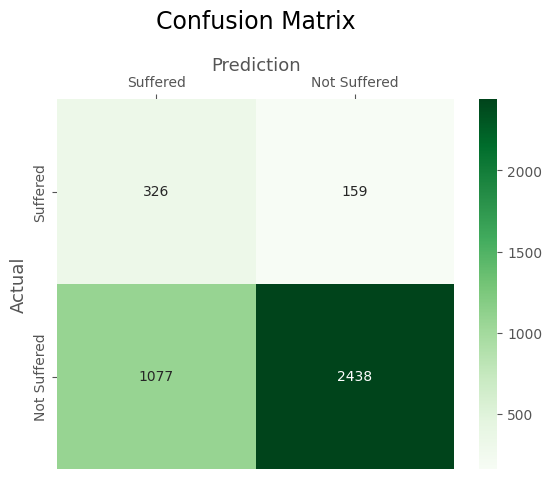

In [106]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm6, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

#  Our KNeighbour Classifier Model does not perform Well on the new Data.

AdaBoost Classifier 

In [107]:
model7 = AdaBoostClassifier()

# model7.fit(x_train, y_train)

AdaBoostClassifier()

In [108]:
# Finding the Accuracy for the AdaBoostClassifier  Model.
print("The training accuracy for AdaBoostClassifier Model are:- ", accuracy_score(model7.predict(x_train), y_train)) 
print("The testing accuracy for AdaBoostClassifier Model are:- ", accuracy_score(model7.predict(x_test), y_test))
model7_accu = accuracy_score(model7.predict(x_test), y_test)
print("The confusion matrix for AdaBoostClassifier Model are:- ", confusion_matrix(model7.predict(x_test), y_test))
cm7 = confusion_matrix(model7.predict(x_test), y_test)
print("The classification report for AdaBoostClassifier Model are:- ", classification_report(model7.predict(x_test), y_test))

The training accuracy for AdaBoostClassifier Model are:-  0.685625
The testing accuracy for AdaBoostClassifier Model are:-  0.66875
The confusion matrix for AdaBoostClassifier Model are:-  [[ 182  104]
 [1221 2493]]
The classification report for AdaBoostClassifier Model are:-                precision    recall  f1-score   support

           0       0.13      0.64      0.22       286
           1       0.96      0.67      0.79      3714

    accuracy                           0.67      4000
   macro avg       0.54      0.65      0.50      4000
weighted avg       0.90      0.67      0.75      4000



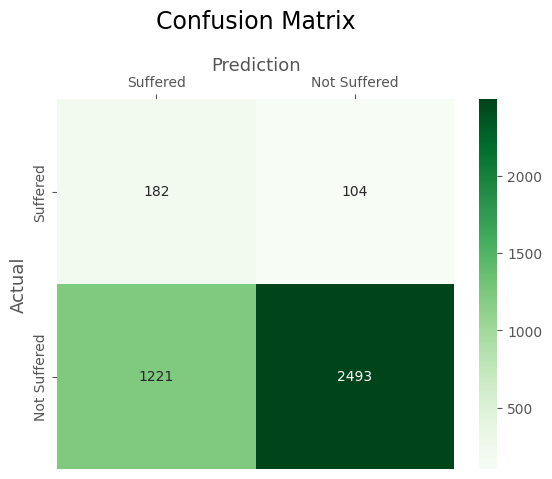

In [109]:
# Create the heatmap for the Bettter Understanding.
# plt.figure(figsize=(6,3))
sns.heatmap(cm7, 
            annot=True,
            fmt='g', 
            xticklabels=['Suffered','Not Suffered'],
            yticklabels=['Suffered','Not Suffered'], cmap="Greens")
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

#  Our KNeighbour Classifier Model does not perform Well on the new Data.

## Model Comparision.


In [131]:
models = pd.DataFrame({
    "Models": [
    "LogisticRegression",
    "KNeighborsClassifier",
    "SVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    "AdaBoostClassifier"
],
    "Accuracy": [model1_accu * 100, model2_accu * 100, model3_accu * 100, model4_accu * 100, model5_accu * 100, model6_accu * 100, model7_accu * 100]
})
models.sort_values(by="Accuracy", ascending=False)

,Models,Accuracy
2,SVC,69.175
3,DecisionTreeClassifier,69.175
5,GradientBoostingClassifier,69.125
6,AdaBoostClassifier,66.875
0,LogisticRegression,66.650
4,RandomForestClassifier,64.925
1,KNeighborsClassifier,62.650


In [126]:
# models["Accuracy"].sort_values(ascending=False)

In [132]:
## Save the Model in the Pickle Format.
with open("best_model", "wb") as f:
    pickle.dump(model3, f)

In [133]:
# Load the Saved Model for the Prediction
load_model = pickle.load(open("best_model", "rb"))
load_model

SVC()

In [147]:
#  Make the Predictive System for the SVC Model.
x_test[8]

array([-1.00050013,  0.80970583,  0.69625563, -1.42093637,  0.00248963,
        0.42691156, -1.6602316 , -0.07802232, -0.99762781, -0.98240477,
       -1.00137595,  1.00878862,  1.01511421, -1.00652126, -1.03876325,
        0.99787725, -1.002002  ,  1.01346565, -0.99314847, -0.06432377,
        1.56802712, -0.8682484 ])

In [144]:
y_test.head(20)

19264    1
14899    1
302      0
8521     1
4117     0
5036     1
9852     1
12473    1
5740     0
15094    1
9417     0
8157     1
13650    1
8960     1
18843    0
18302    0
10712    1
10273    1
36       0
15014    0
Name: Dry Eye Disease, dtype: int32

In [148]:
prediction = load_model.predict([[-1.00050013,  0.80970583,  0.69625563, -1.42093637,  0.00248963,
        0.42691156, -1.6602316 , -0.07802232, -0.99762781, -0.98240477,
       -1.00137595,  1.00878862,  1.01511421, -1.00652126, -1.03876325,
        0.99787725, -1.002002  ,  1.01346565, -0.99314847, -0.06432377,
        1.56802712, -0.8682484]])

if prediction[0] == 0:
    print("The person dont have the Dry Eye Disease")
else:
    print("The Person have the Dry Eye Disease")

The Person have the Dry Eye Disease


In [138]:
dataset.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Sleep disorder,Feel sleepy during day,...,Ongoing medication,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP,Pulse pressure
0,0,24,9.5,2,1,67,3000,31,1,0,...,1,8.7,0,1,1,0,1,137,89,48
1,1,39,9.6,2,3,60,12000,74,0,0,...,1,9.6,1,0,0,1,1,108,64,44
2,0,45,5.4,1,5,95,12000,93,1,0,...,0,4.0,0,1,0,0,0,134,81,53
3,0,45,5.4,4,5,78,19000,32,0,0,...,0,7.6,0,1,0,1,0,110,90,20
4,0,42,5.7,3,2,72,4000,173,0,0,...,0,3.5,0,1,1,0,1,99,67,32
